In [9]:
import pandas as pd
import numpy as np

# Read the CSV file
folds = 10
species = ["H", "N", "O", "O2", "N2", "He"] #, 
for species in species:
    print(f"Processing {species}")
    rmspe_list = []
    for fold in range(1, folds):
        name_ = f"{species}_increasing_cs" # f"{species}"
        dir = f"../log/{name_}" 
        file_name = f"{dir}/logFile_numPointsTotal1800000_numBlocksTotal20000_m200_seed{fold}_isScaled1_{name_}.csv"
        df = pd.read_csv(file_name)

        # Calculate mean for each fold
        rmspe_list.append(df['rmspe'].iloc[0])  # Get the third row (index 2 since 0-based)

    # Display the means
    print("Mean values for each fold:")
    print(rmspe_list)

    # Calculate overall mean
    overall_mean = np.mean(rmspe_list)
    print("\nOverallmean:", overall_mean)


Processing H
Mean values for each fold:
[0.501656821133606, 0.513778187845209, 0.533284373643202, 0.490045328849876, 0.515159888723267, 0.50069462237671, 0.495810494408488, 0.496080355467743, 0.505840135590082]

Overallmean: 0.5058166897820204
Processing N
Mean values for each fold:
[0.450987652192245, 0.52218484175995, 0.507027952692072, 0.641929988057716, 0.590965863224297, 0.437866305603338, 0.545312095882703, 0.583611567867863, 0.589327517265366]

Overallmean: 0.5410237538383945
Processing O
Mean values for each fold:
[0.594835610671366, 0.418019860235626, 0.496575561764418, 0.47429682735147, 0.595408725101668, 0.47381296532776, 0.469595706841377, 0.500036263525966, 0.418127490573781]

Overallmean: 0.493412112377048
Processing O2
Mean values for each fold:
[0.536478383747639, 0.585819243231266, 0.663555244259658, 0.547660055562601, 0.532440088988832, 0.469910594340233, 0.564726576284754, 0.493444232880991, 0.41795772032093]

Overallmean: 0.5346657932907671
Processing N2
Mean values

In [10]:
import pandas as pd
import numpy as np

# Read the CSV file
num_m_ests = [200] #[100, 200]
folds = 10
speciess = ["H", "N", "O", "O2", "N2", "He"] #, 
param_list = []
for species in speciess:
    print(f"Processing {species}")
    for num_m_est in num_m_ests:
        print(f"Processing m_est {num_m_est}")
        param_list_ = []
        for fold in range(1, folds):
            dir = f"../log/{species}"
            file_name = f"{dir}/theta_numPointsTotal1800000_numBlocksPerProcess20000_m{num_m_est}_seed{fold}_isScaled1.csv"
            # Get first row values
            df = pd.read_csv(file_name, header=None)
            param_list_.append(df.iloc[0].values[2:10])  # Get first row as array
        # Convert list of arrays to 2D numpy array
        param_array_ = np.array(param_list_)
        
        # Calculate mean along first axis (across all folds)
        param_means_ = np.mean(param_array_, axis=0)
        param_list.append(param_means_)

Processing H
Processing m_est 200
Processing N
Processing m_est 200
Processing O
Processing m_est 200
Processing O2
Processing m_est 200
Processing N2
Processing m_est 200
Processing He
Processing m_est 200


In [11]:
# here you can run the r code and paste the results here
param_list_sv = [[1.42393238028999,3.14417046017901,3.80206609113493,3.5296716887804,0.524384114769954,0.594443084148257,0.0720267439231155,0.0955883344978679,0.0861223708114616],
[1.41016952808123,5.39942506916278,4.28790193612321,4.2451074318842,0.515539155777866,0.591183617260562,0.0705946101787553,0.0946823147047651,0.0860897156395527],
[1.52582742258293,3.05315012887577,4.10314549883096,2.90575229809965,0.537217898154586,0.610663800361358,0.0722879290510518,0.098024798747556,0.0875235170718118],
[1.44024563699474,262.191355907451,4.0254784820191,3.90975210340995,0.517540858524512,0.586649073944036,0.0710606637464692,0.0952218994520268,0.0864942044357748],
[5.63250788717237,1.09862904381361,6.5975411927154,0.91372222211258,0.935054271817414,0.858616080932198,0.0949842856658792,0.137695360618976,0.113196141662628],
[2.07667252124848,1.82500714778064,5.54963363633788,1.46268532977646,0.628255816873663,0.662433160670471,0.0800881265789859,0.109071847038482,0.0911732919499203]]

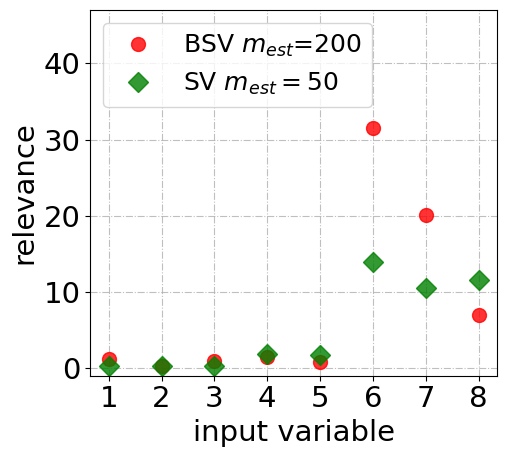

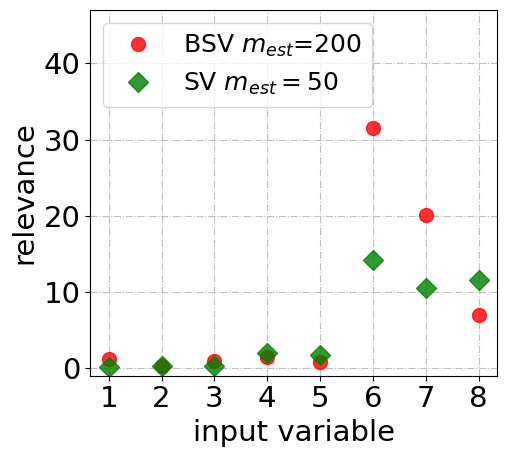

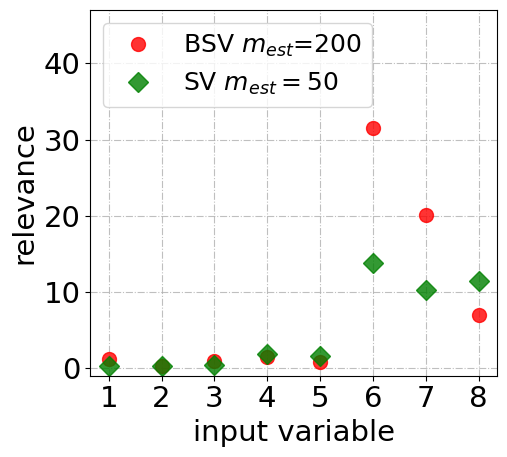

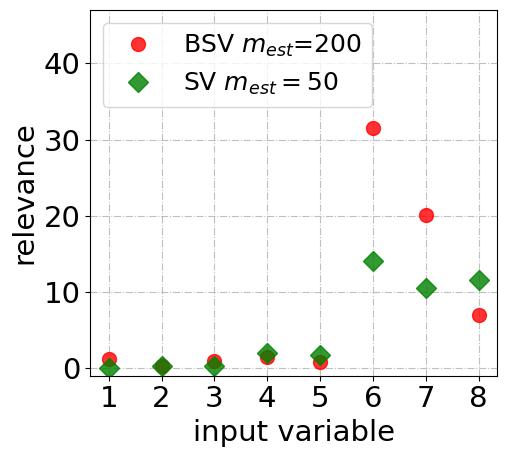

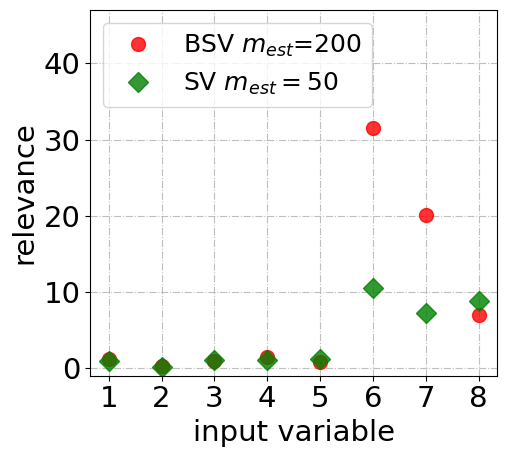

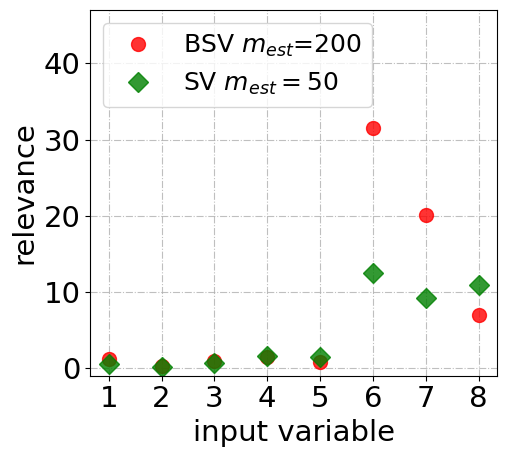

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Set default font size to 16
plt.rcParams.update({'font.size': 21})

# Create x-axis values (1 through 10)
x = np.arange(1, 9)

# Define markers and colors to match the reference image
markers = ['o', 'D', 'h', '+', '^', 'v']  # H, O2, N, N2, He, O
colors = ['red', 'green']
# colors = ['m', 'r', 'g', 'b', 'c', 'k']   # magenta, red, green, blue, cyan, black

for i in range(len(speciess)):
    # Set up the plot
    plt.figure(figsize=(5.5, 5))
    for j in range(len(num_m_ests)):
        plt.plot(x, 1/param_list[j], linestyle='None', markersize=10,label=r"BSV $m_{est}$=" + str(num_m_ests[j]), marker=markers[j],  color=colors[j], alpha=0.8) 
        # plt.plot(x, 1/param_list[i*2 + j], linestyle='None', markersize=10,label=r"BSV $m_{est}$=" + str(num_m_ests[j]), marker=markers[j],  color=colors[j], alpha=0.8) 
    # sv results 0 is the variance 1:9 is the other parameters
    plt.plot(x, 1/np.array(param_list_sv[i][1:9]), linestyle='None', markersize=10,label=r"SV $m_{est}=50$", marker=markers[j+1],  color=colors[j+1], alpha=0.8)
     
    # Customize the plot
    plt.xticks(x)  # Use simple numbered x-axis
    # plt.yscale('log')
    plt.grid(True, ls="-.", alpha=0.8) #, which="both", 
    plt.xlabel('input variable')
    plt.ylabel('relevance')
    plt.ylim(-1, 47)
    # plt.title(f"Dataset {speciess[i]}")
    plt.legend(loc='upper left', fontsize=18) #bbox_to_anchor=(1.05, 1), 

    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    plt.savefig(f"./fig/{speciess[i]}_params.pdf")

    plt.show()#

# # Plot points for each species
# for i, (species_name, marker, color) in enumerate(zip(species, markers, colors)):
#     # Get the corresponding parameters (using only m=200 results)
#     species_params = param_list[i*2 + 1]  # Get odd indices for m=200
#     plt.plot(x, 1/species_params, marker=marker, linestyle='None', 
#              label=species_name, color=color, markersize=8)